# ⚡ Параллельные рабочие процессы агентов с моделями GitHub (Python)

## 📋 Продвинутый учебник по параллельной обработке

Этот ноутбук демонстрирует **шаблоны параллельных рабочих процессов** с использованием Microsoft Agent Framework. Вы узнаете, как создавать высокопроизводительные рабочие процессы, где несколько AI-агентов работают одновременно, значительно увеличивая пропускную способность и позволяя реализовывать сложные многопоточные бизнес-процессы.

## 🎯 Цели обучения

### 🚀 **Основы параллельной обработки**
- **Параллельное выполнение агентов**: Запуск нескольких агентов одновременно для максимальной эффективности
- **Оркестрация рабочих процессов**: Координация параллельных операций с сохранением согласованности данных
- **Оптимизация производительности**: Достижение значительного ускорения за счет параллельной обработки
- **Управление ресурсами**: Эффективное использование ресурсов AI-моделей в параллельных операциях

### 🏗️ **Продвинутые шаблоны параллельной обработки**
- **Обработка Fork-Join**: Разделение работы между несколькими агентами и объединение результатов
- **Параллелизм конвейера**: Перекрытие этапов выполнения для непрерывной пропускной способности
- **Балансировка нагрузки**: Равномерное распределение работы между доступными ресурсами агентов
- **Точки синхронизации**: Координация параллельных агентов на критических этапах рабочего процесса

### 🏢 **Корпоративные приложения параллельной обработки**
- **Обработка документов в больших объемах**: Одновременная обработка множества документов
- **Анализ контента в реальном времени**: Параллельный анализ входящих потоков данных
- **Оптимизация пакетной обработки**: Максимизация пропускной способности для крупномасштабных операций
- **Мультимодальный анализ**: Параллельная обработка различных типов контента (текст, изображения, данные)

## ⚙️ Предварительные требования и настройка

### 📦 **Необходимые зависимости**

Установите Agent Framework с возможностями параллельной обработки:

```bash
pip install agent-framework-core -U
```

### 🔑 **Настройка моделей GitHub**

**Настройка окружения (.env файл):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

**Особенности параллельной обработки:**
- **Ограничения скорости**: Следите за ограничениями скорости API моделей GitHub для параллельных запросов
- **Использование ресурсов**: Учитывайте использование памяти и процессора при работе нескольких агентов
- **Обработка ошибок**: Реализуйте надежное восстановление после ошибок для параллельных операций

### 🏗️ **Архитектура параллельного рабочего процесса**

```mermaid
graph TD
    A[Workflow Start] --> B[Concurrent Execution]
    B --> C[Agent Pool 1]
    B --> D[Agent Pool 2]
    B --> E[Agent Pool 3]
    C --> F[Result Aggregation]
    D --> F
    E --> F
    F --> G[Final Output]
    
    H[GitHub Models API] --> C
    H --> D
    H --> E
```

**Основные преимущества:**
- **⚡ Производительность**: Значительное ускорение благодаря параллельному выполнению
- **📈 Масштабируемость**: Обработка увеличенных объемов работы без пропорционального увеличения времени
- **🔄 Эффективность**: Лучшее использование доступных вычислительных ресурсов
- **🎯 Пропускная способность**: Обработка большего объема работы за то же время

## 🎨 **Шаблоны проектирования параллельных рабочих процессов**

### 🔍 **Конвейер исследований и анализа**
```
Research Task → Parallel Research Agents → Content Synthesis → Quality Review
```

### 📊 **Рабочий процесс обработки данных**
```
Input Data → Concurrent Processing Agents → Result Aggregation → Final Report
```

### 🎭 **Конвейер создания контента**
```
Content Brief → Parallel Content Generators → Review & Merge → Final Content
```

### 🔄 **Многоэтапная обработка**
```
Input → Stage 1 (Concurrent) → Stage 2 (Concurrent) → Stage 3 (Sequential) → Output
```

## 🏢 **Преимущества корпоративной производительности**

### ⚡ **Оптимизация пропускной способности**
- **Параллельное выполнение**: Одновременная работа нескольких агентов
- **Использование ресурсов**: Максимальная эффективность доступной мощности AI-моделей
- **Сокращение времени**: Значительное уменьшение общего времени обработки
- **Масштабируемая архитектура**: Легкое добавление новых параллельных агентов по мере необходимости

### 🛡️ **Надежность и устойчивость**
- **Устойчивость к сбоям**: Отказ одного агента не останавливает весь рабочий процесс
- **Изоляция ошибок**: Проблемы в одной параллельной ветке не влияют на другие
- **Плавная деградация**: Система продолжает работать даже с уменьшенной мощностью агентов
- **Механизмы восстановления**: Автоматический повтор и обработка ошибок для неудачных операций

### 📊 **Мониторинг и наблюдаемость**
- **Отслеживание параллельного выполнения**: Мониторинг прогресса всех параллельных операций
- **Метрики производительности**: Измерение ускорения и прироста эффективности
- **Аналитика использования ресурсов**: Оптимизация распределения агентов
- **Идентификация узких мест**: Поиск и устранение ограничений производительности

Давайте создадим высокопроизводительные параллельные AI-рабочие процессы! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
import os
from typing import Any

from agent_framework import ChatMessage, ConcurrentBuilder,WorkflowViz
from agent_framework.openai import OpenAIChatClient

In [3]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), model_id="gpt-4o" )

In [4]:
ResearcherAgentName = "Researcher-Agent"
ResearcherAgentInstructions = "You are my travel researcher, working with me to analyze the destination, list relevant attractions, and make detailed plans for each attraction."

In [5]:
PlanAgentName = "Plan-Agent"
PlanAgentInstructions = "You are my travel planner, working with me to create a detailed travel plan based on the researcher's findings."

In [6]:
research_agent   = chat_client.create_agent(
        instructions=(
           ResearcherAgentInstructions
        ),
        name=ResearcherAgentName,
    )

plan_agent = chat_client.create_agent(
        instructions=(
            PlanAgentInstructions
        ),
        name=PlanAgentName,
    )

In [7]:
workflow = ConcurrentBuilder().participants([research_agent, plan_agent]).build()

In [8]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  dispatcher["dispatcher (Start)"];
  Researcher_Agent["Researcher-Agent"];
  Plan_Agent["Plan-Agent"];
  aggregator["aggregator"];
  fan_in__aggregator__69d73de8((fan-in))
  Plan_Agent --> fan_in__aggregator__69d73de8;
  Researcher_Agent --> fan_in__aggregator__69d73de8;
  fan_in__aggregator__69d73de8 --> aggregator;
  dispatcher --> Researcher_Agent;
  dispatcher --> Plan_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "dispatcher" [fillcolor=lightgreen, label="dispatcher\n(Start)"];
  "Researcher-Agent" [label="Researcher-Agent"];
  "Plan-Agent" [label="Plan-Agent"];
  "aggregator" [label="aggregator"];

  "fan_in::aggregator::69d73de8" [shape=ellipse, fillcolor=lightgoldenrod, label="fan-in"];
  "Plan-Agent" -> "fan_in::aggregator::69d73de8";
  "Researcher-Agent" -> "fan_in::aggregator::69d73de8";
  "fan_in::aggre

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpoq68cqjk.svg


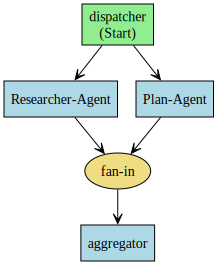

In [9]:
from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [10]:
events = await workflow.run("Plan a trip to Seattle in December")
outputs = events.get_outputs()

In [11]:
if outputs:
        print("===== Final Aggregated Conversation (messages) =====")
        for output in outputs:
            messages: list[ChatMessage] | Any = output
            for i, msg in enumerate(messages, start=1):
                name = msg.author_name if msg.author_name else "user"
                print(f"{'-' * 60}\n\n{i:02d} [{name}]:\n{msg.text}")

===== Final Aggregated Conversation (messages) =====
------------------------------------------------------------

01 [user]:
Plan a trip to Seattle in December
------------------------------------------------------------

02 [Researcher-Agent]:
Seattle is a wonderful place to visit in December, with vibrant winter festivities, seasonal attractions, and gorgeous views of the Pacific Northwest. Despite the chilly weather and occasional rain, Seattle’s charm shines through its indoor and outdoor attractions. Here's a detailed plan for your trip:

---

### **Destination Overview: Seattle in December**
- **Weather**: Expect average highs of around 47°F (8°C) and lows near 37°F (3°C). Rain is frequent, so bring waterproof clothing.
- **Packing List**:
  - Warm layers (sweaters, coats, gloves, and hats).
  - Comfortable walking shoes (water-resistant is ideal).
  - Umbrella or rain jacket.

---

### **Day 1: Exploring Downtown Seattle**
#### **Morning**: **Pike Place Market**
- One of Seattl


---

**Отказ от ответственности**:  
Этот документ был переведен с помощью сервиса автоматического перевода [Co-op Translator](https://github.com/Azure/co-op-translator). Несмотря на наши усилия обеспечить точность перевода, автоматические переводы могут содержать ошибки или неточности. Оригинальный документ на его родном языке следует считать авторитетным источником. Для получения критически важной информации рекомендуется профессиональный перевод человеком. Мы не несем ответственности за любые недоразумения или неправильные интерпретации, возникшие в результате использования данного перевода.
